### Statistics of unconditional generated rules.

In [1]:
import sys
# sys.path.append("/n/home12/binxuwang/Github/mini_edm")
sys.path.append("/n/home12/binxuwang/Github/DiffusionReasoning")

In [2]:
import os
from os.path import join
import pickle as pkl
import torch
from easydict import EasyDict as edict
from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import einops
import json


In [3]:
expdir = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiT/results/045-RAVEN10_abstract-uncond-DiT_S_1_20240311-1256"

In [9]:
data = np.load(join(expdir, "samples_inferred_rule_consistency_new.npz"), allow_pickle=True)
list(data.keys())


['consistency_all', 'rule_list_all', 'epoch_list']

In [29]:
print(data['epoch_list'])
print(len(data['epoch_list']))

[      1    1000    2000 ... 1003000 1004000 1005000]
1006


In [10]:
print(data['rule_list_all'].shape)
print(data['rule_list_all'].dtype)

(1006, 1024, 3)
object


In [12]:
# last sample in last generation
data['rule_list_all'][-1,-1]

array([array([26]), array([26]), array([26])], dtype=object)

In [23]:
# Concanate all the rules for all the samples in the last generation. ignore the invalid rules
rule_pool = np.concatenate(list(data['rule_list_all'][-1,:,:].flatten())).astype(int)

In [24]:
print(len(rule_pool))

2490


The held out rules for this training dataset are [1, 16, 20, 34, 37]. So generation of these rules are kind of generalization in the rule space. 

In [27]:
# Count the occurrence of each rule using pandas
rule_counts = pd.Series(rule_pool).value_counts()
print(rule_counts)

12    106
26    105
35    104
39    102
25    102
38     99
5      95
10     95
13     94
30     93
2      92
15     90
24     87
6      87
36     86
33     83
23     78
22     76
21     72
14     72
11     67
32     63
9      62
4      62
31     60
3      54
0      51
7      49
16     45
8      45
18     27
28     25
29     20
20     18
19     13
17      5
27      4
37      1
1       1
Name: count, dtype: int64


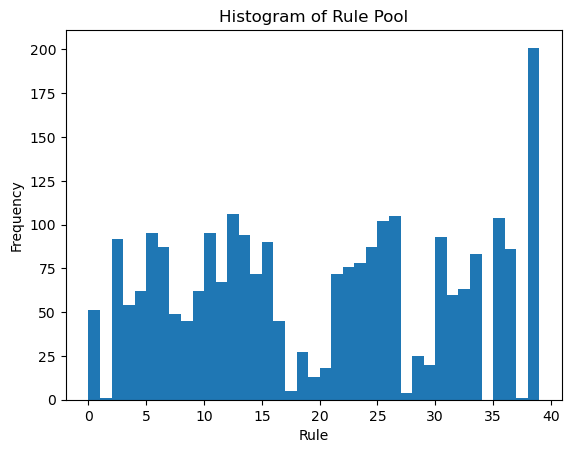

In [28]:
# Histogram of rule pool
plt.hist(rule_pool, bins=len(np.unique(rule_pool)))
plt.xlabel('Rule')
plt.ylabel('Frequency')
plt.title('Histogram of Rule Pool')
plt.show()